## Multinomial Logistic Regression:

Using a combination of governance characteristics and organizational characteristics (revenue, assets, ect.) I will predict salary using a Multinomial Logistic Regression model.

In [47]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import stats
from scipy.special import boxcox, inv_boxcox
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from numpy import interp
from sklearn.metrics import mean_squared_error
import joblib

## IMPORT DATA

In [2]:
# import modeling dataset
features = pd.get_dummies(pd.read_csv('02.data/model_dataset_features_eng.csv'))
X = features.drop(['reportable_comp'], axis=1)

y = pd.read_csv('02.data/target_categories_box_cox.csv', header=None, squeeze=True)

In [3]:
# verify the size of target and
# feature datasets are the same
X.shape[0] == y.shape[0]

True

## Multinomial Logistic


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
# randomly choose 10K rows
# to parameter tune on
feature_sample = pd.concat([
    X_train,
    y_train
], axis=1).sample(n=10000)

X_train_sample = feature_sample.drop(0, axis=1)
y_train_sample = feature_sample.loc[:, 0]

In [7]:
log_clf = LogisticRegression()

param_grid = { 
    'penalty': ['l2'],
    'C': [.01, .5, 1],
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
    'max_iter' : [50, 100, 500]
}

cv_log_clf = GridSearchCV(estimator=log_clf, param_grid=param_grid, cv=3)
cv_log_clf.fit(X_train_sample, y_train_sample)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.5, 1], 'max_iter': [50, 100, 500],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
cv_log_clf.best_params_

{'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}

In [11]:
log_clf = LogisticRegression(**cv_log_clf.best_params_)

In [12]:
log_clf.fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
# save model
joblib.dump(log_clf, 'models/log_clf_model.pkl')

['models/log_clf_model.pkl']

In [13]:
# test model
log_clf.score(X_train, y_train)

0.21497992925971643

In [14]:
# test model on unseen data
log_clf.score(X_test, y_test)

0.21532589304235988

In [15]:
# predict categores
pred = log_clf.predict(X_test)

In [16]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(y_test, pred) / \
confusion_matrix(y_test, pred).sum(axis=1, keepdims=True)

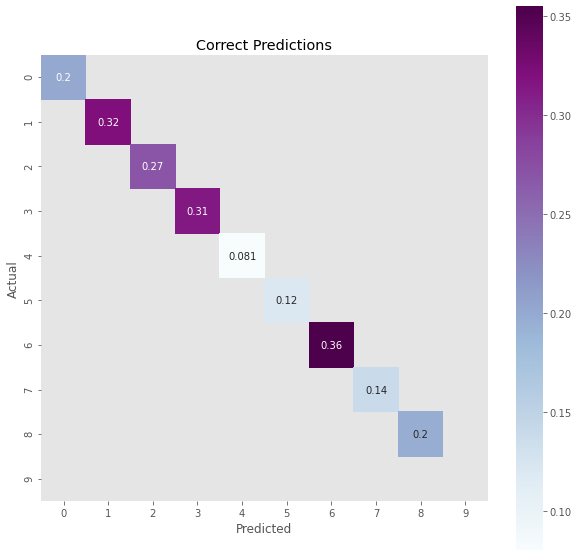

In [17]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(np.where(np.diagflat(np.diagonal(norm_conf_matrix))
            ==0, np.nan, np.diagflat(np.diagonal(norm_conf_matrix))),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Correct Predictions');

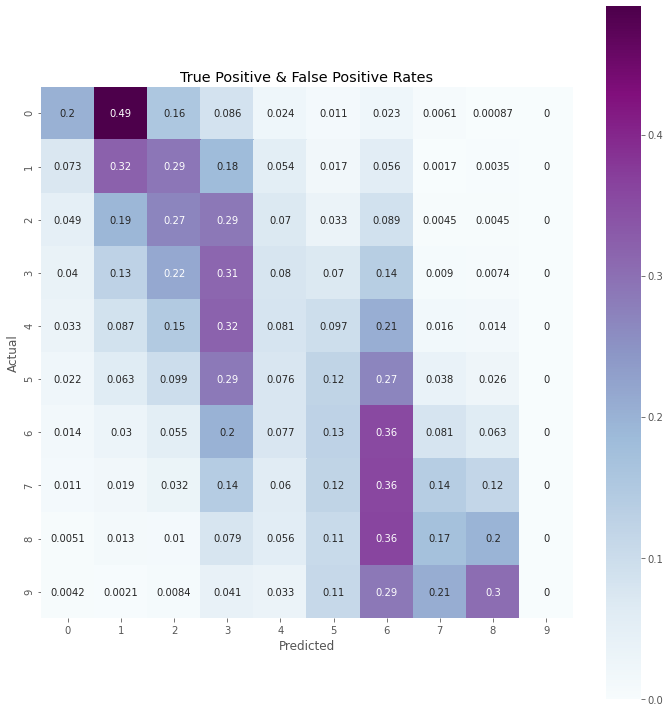

In [46]:
# compare correct and incorrect predictions
plt.figure(figsize=(10, 10))
# np.fill_diagonal(norm_conf_matrix, 0)

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=True, 
                 cmap='BuPu')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('True Positive & False Positive Rates')
plt.tight_layout()
plt.savefig('03.visualizations/heat_map_log_clf.png');

In [21]:
log_clf.coef_

array([[-2.47565017e-04, -2.40629590e-08, -4.13105821e-08,
         4.94387307e-09, -5.24643670e-02, -1.88600253e-01,
         2.34845298e-03, -1.53140144e-04, -7.01104981e-08,
         4.45453332e-08, -6.64934586e-02, -7.71677973e-02,
        -9.60767798e-02,  5.91174406e-04,  3.69191038e-01,
        -1.95312631e-01, -1.87176609e-01,  3.15328387e-02,
         2.39365559e-02, -4.91914266e-02, -2.10629685e-02,
        -1.04492573e-01,  4.53886906e-02,  1.61949594e-02,
         2.85586618e-02, -2.14602461e-01,  9.14027397e-02,
         8.09950464e-03,  1.54498282e-02, -8.65221534e-02,
         8.65588129e-02,  6.89786557e-03],
       [-2.72578818e-04, -1.78683946e-08, -2.72456691e-08,
         6.52163228e-09, -1.09873356e-01,  1.55754925e-01,
        -1.07230959e-05, -4.95845850e-05, -2.83545932e-07,
        -7.14249603e-07, -7.05273518e-02, -2.61653980e-02,
        -7.07391510e-02,  2.87249587e-04,  3.79920265e-01,
        -3.92494598e-01, -8.98235175e-02,  2.56041018e-01,
        -1.11

In [23]:
# f_importances = pd.Series(log_clf.coef_, 
#           X_train.columns).sort_values(ascending=False)

In [24]:
# f_importances.plot(kind='barh', figsize=(8, 8))
# plt.tight_layout()
# plt.savefig('03.visualizations/gbc_feature_importance.png');

## Examining classification results 

### 1. Compare category assignment salaries against actual salaries and compute MSE(mean squared error)

In [26]:
# import dict with mean salary for each category
category_median_salary = pd.read_csv('02.data/category_median_salary.csv', squeeze=True).to_dict()

In [27]:
# access median salary for each category within dictionary
pd.Series(pred).apply(lambda x: category_median_salary[x])

0        241712.0
1         85079.0
2        101667.5
3        241712.0
4         85079.0
           ...   
24098    333669.0
24099    101667.5
24100    122761.0
24101    187775.0
24102     85079.0
Length: 24103, dtype: float64

In [30]:
np.sqrt(mean_squared_error(y_test, pd.Series(pred).apply(lambda x: category_median_salary[x])))

154295.7266154272

### 2. Compare composite salaries against actual salaries and compute MSE(mean squared error)

In [32]:
# examine probability of assignment
# to specific categories
prob_pred = pd.DataFrame(log_clf.predict_proba(X_test))

In [33]:
prob_pred

,0,1,2,3,4,5,6,7,8,9
0,5.165131e-09,2.303124e-06,0.000344,0.008676,0.029734,0.102164,0.179302,0.266700,0.248448,0.164630
1,7.708812e-02,1.469794e-01,0.169095,0.157867,0.162320,0.110873,0.089331,0.058594,0.021232,0.006620
2,6.309718e-02,1.473548e-01,0.167944,0.175521,0.141857,0.123036,0.083117,0.050062,0.034447,0.013563
3,1.611254e-09,1.339060e-06,0.000129,0.004625,0.022465,0.081627,0.178599,0.271388,0.244331,0.196835
4,5.181906e-02,1.429141e-01,0.164100,0.148315,0.134557,0.122768,0.114189,0.069546,0.037889,0.013903
...,...,...,...,...,...,...,...,...,...,...
24098,6.744825e-09,8.328822e-07,0.000097,0.003933,0.020403,0.077632,0.190036,0.255045,0.255934,0.196918
24099,7.953612e-03,5.981966e-02,0.133363,0.167549,0.157934,0.157371,0.148017,0.089877,0.056598,0.021517
24100,6.791370e-03,7.969460e-02,0.146189,0.156387,0.157444,0.155407,0.133630,0.088538,0.056301,0.019619
24101,1.601354e-02,1.170086e-01,0.134718,0.129544,0.139162,0.134962,0.160879,0.103471,0.046897,0.017345


In [36]:
# examine dictionary to make sure it looks as it should
category_median_salary

{0: 60000.0,
 1: 72000.0,
 2: 85079.0,
 3: 101667.5,
 4: 122761.0,
 5: 152129.0,
 6: 187775.0,
 7: 241712.0,
 8: 333669.0,
 9: 537557.5}

In [38]:
# multipy each column probability by 
# the median value for that salary category
frac_salary = pd.DataFrame(prob_pred)

for column in frac_salary.columns:
    frac_salary[column] = frac_salary[column] * category_median_salary[column]

In [39]:
frac_salary

,0,1,2,3,4,5,6,7,8,9
0,0.000310,0.165825,29.256093,882.100451,3650.137938,15542.088363,33668.508748,64464.630304,82899.294487,88497.908709
1,4625.287215,10582.515529,14386.464208,16049.955075,19926.544635,16867.000118,16774.178457,14162.918918,7084.332067,3558.688737
2,3785.830936,10609.542096,14288.520127,17844.792065,17414.472565,18717.387253,15607.357116,12100.532275,11494.007123,7291.088793
3,0.000097,0.096412,10.977690,470.248034,2757.784326,12417.800932,33536.468346,65597.682067,81525.761854,105809.912024
4,3109.143624,10289.818321,13961.467065,15078.764723,16518.366888,18676.517877,21441.854417,16810.128771,12642.446333,7473.729046
...,...,...,...,...,...,...,...,...,...,...
24098,0.000405,0.059968,8.282358,399.906529,2504.746508,11810.107557,35684.013146,61647.371873,85397.207493,105854.781508
24099,477.216707,4307.015796,11346.365215,17034.299051,19388.176819,23940.742691,27793.927067,21724.359948,18885.134655,11566.417184
24100,407.482226,5738.010936,12437.592834,15899.458443,19327.934692,23641.948619,25092.405409,21400.707359,18785.799034,10546.168373
24101,960.812612,8424.621683,11461.678367,13170.445349,17083.685518,20531.620947,30209.072854,25010.127701,15647.948681,9323.875102


In [40]:
np.sqrt(mean_squared_error(y_test, frac_salary.sum(axis=1)))

172216.4993023053

### 3. Compare category assignment for top two categories against actual salaries and compute MSE(mean squared error)

In [41]:
# find top two percents
top_two_prob = pd.DataFrame(prob_pred).apply(lambda x: pd.Series(x.nlargest(2)), axis=1)

In [42]:
# prorate percentages to 100% total
top_two_prob = top_two_prob.div(top_two_prob.sum(axis=1), axis=0)

In [43]:
# multiply each percent by 
# corresponding median category level
for column in top_two_prob.columns:
    top_two_prob[column] = top_two_prob[column] * category_median_salary[column]

In [44]:
np.sqrt(mean_squared_error(y_test, top_two_prob.sum(axis=1)))

223045.27698153516

### Comparison between all methods

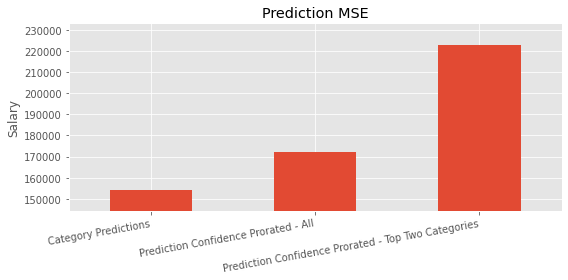

In [45]:
# combine adjustments to be able to plot
# and visualize differences between each
ax = pd.DataFrame(index=['Category Predictions',
    'Prediction Confidence Prorated - All',
    'Prediction Confidence Prorated - Top Two Categories'],
data=[np.sqrt(mean_squared_error(y_test, pd.Series(pred).apply(lambda x: category_median_salary[x]))),
np.sqrt(mean_squared_error(y_test, frac_salary.sum(axis=1))),
np.sqrt(mean_squared_error(y_test, top_two_prob.sum(axis=1)))]).plot(kind='bar',
                                                                      figsize=(8,4), 
                                                                    legend=False)

plt.ylim((pd.DataFrame(index=['Category Predictions',
    'Prediction Confidence Prorated - All',
    'Prediction Confidence Prorated - Top Two Categories'],
data=[np.sqrt(mean_squared_error(y_test, pd.Series(pred).apply(lambda x: category_median_salary[x]))),
np.sqrt(mean_squared_error(y_test, frac_salary.sum(axis=1))),
np.sqrt(mean_squared_error(y_test, top_two_prob.sum(axis=1)))]).min() - 10000).values,
         (pd.DataFrame(index=['Category Predictions',
    'Prediction Confidence Prorated - All',
    'Prediction Confidence Prorated - Top Two Categories'],
data=[np.sqrt(mean_squared_error(y_test, pd.Series(pred).apply(lambda x: category_median_salary[x]))),
np.sqrt(mean_squared_error(y_test, frac_salary.sum(axis=1))),
np.sqrt(mean_squared_error(y_test, top_two_prob.sum(axis=1)))]).max() + 10000).values)

plt.title('Prediction MSE')
plt.ylabel('Salary')
plt.xticks(rotation=10, horizontalalignment="right")

plt.tight_layout()
# plt.savefig('03.visualizations/classification_adjust_log_clf.png');

The difference is actually quite small, nevertheless there is some benefit to adjusting based on the probability of assignment.